In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/pawar/Desktop/venv/Files/Students_Exam_Scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed Column

In [6]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender Distribution

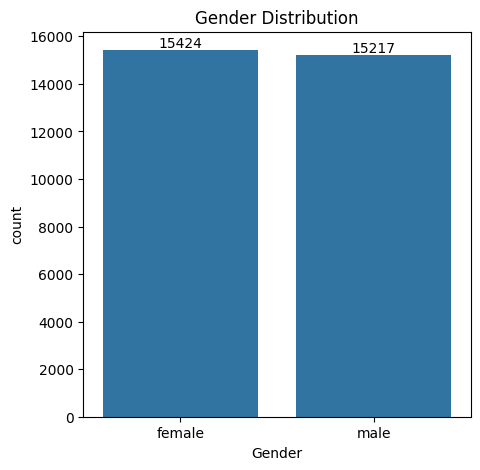

In [7]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

conclusion - From above chart we have analysed that:
The number of females data is more than number of males

In [9]:
gb = df.groupby("Gender").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


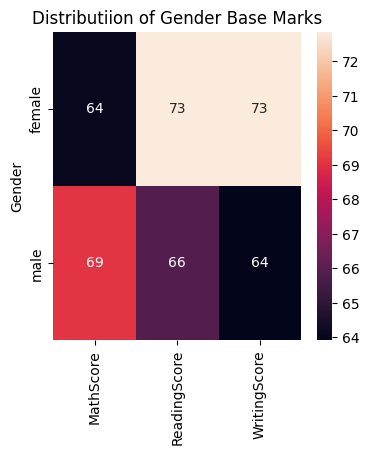

In [10]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True)
plt.title("Distributiion of Gender Base Marks")
plt.show()

Conclusion - From above chart we have analysed that female students are strong in reading and writing 
but weak in maths as compared to male students.

# Relationship between Parent's Education and Student's Score

In [11]:
gb1 = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


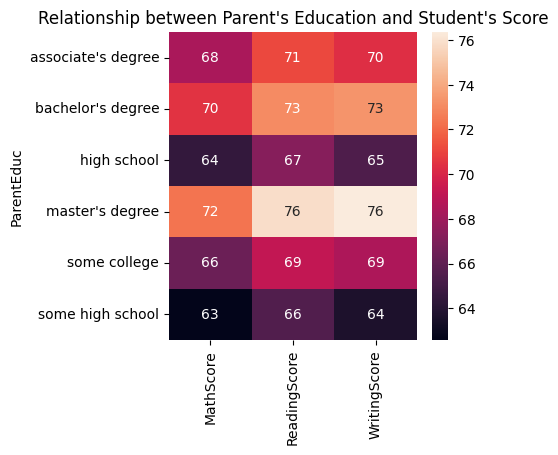

In [12]:
plt.figure(figsize = (4,4))
sns.heatmap(gb1,annot = True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

Conclusion - From above chart we have concluded that the education of parent have a good impact on their kids scores

# Relationship between Parent's Marital Status and Student's Score

In [13]:
gb2 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb2)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


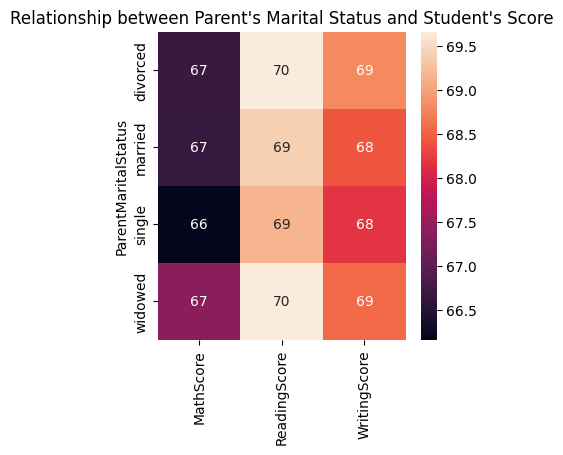

In [14]:
plt.figure(figsize = (4,4))
sns.heatmap(gb2,annot = True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

Conclusion - From the above chart we have concluded that there is no/negligible impact on students score due to their 
Parent marital status 

# First Child

In [15]:
gb3 = df.groupby("IsFirstChild").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb3)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


Conclusion - From the above readings we have concluded that there is no impact of students marks 
whether is first child or not

# Number of Siblings

In [16]:
gb4 = df.groupby("NrSiblings").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb4)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


Conclusion - From the above readings we have concluded that there are no difference of students marks
till 5 number of siblings but after 5 number of siblings there are slightly -1 to +1 points difference

# Students Marks

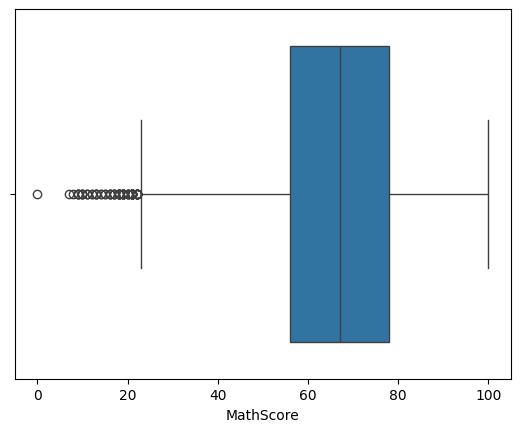

In [17]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

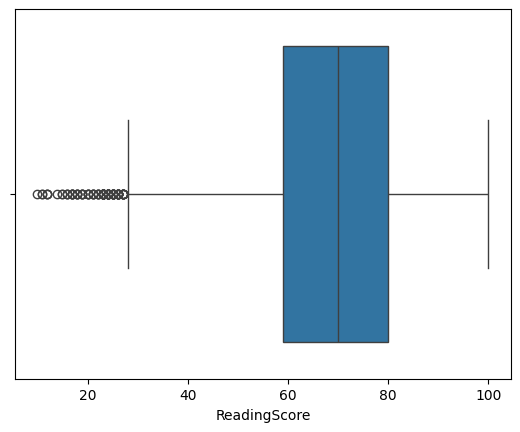

In [18]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

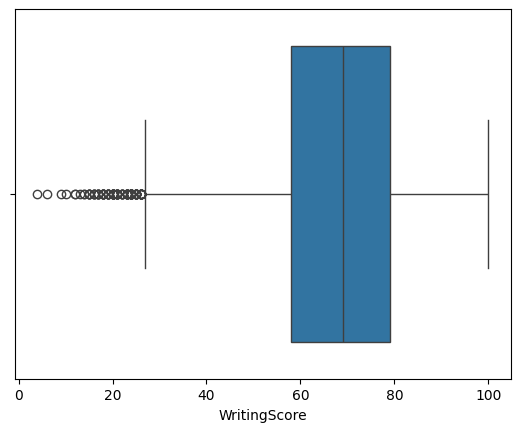

In [19]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

conclusion - From above charts we have concluded that students are comparatively weak in math instead of reading and writing

# Number of Ethnic Groups

In [20]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Groups

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


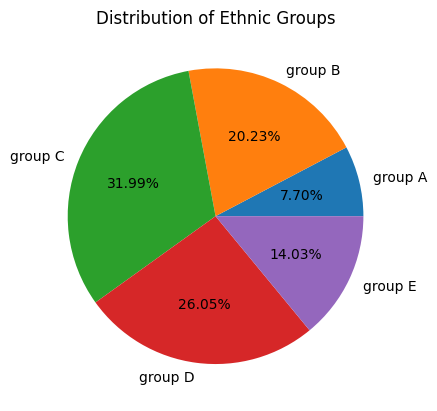

In [21]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]

print(mlist)
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

Conclusion - From above charts we have concluded that:
group C is a largest ethnic group amongst all

# Ethinic Group wise Mark distribution

In [22]:
gb5 = df.groupby("EthnicGroup").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb5)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


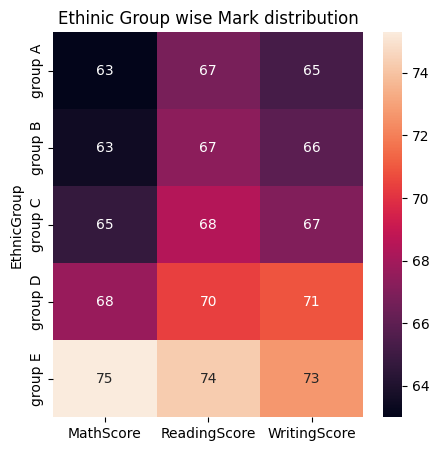

In [23]:
plt.figure(figsize = (5,5))
sns.heatmap(gb5, annot = True)
plt.title("Ethinic Group wise Mark distribution")
plt.show()

Conclusion - From above chart we have concluded that group E students have highest marks in all subjects 
as compared to other ethnic groups

# Distributiion of Practice Sport 

In [24]:
gb6 = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb6)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


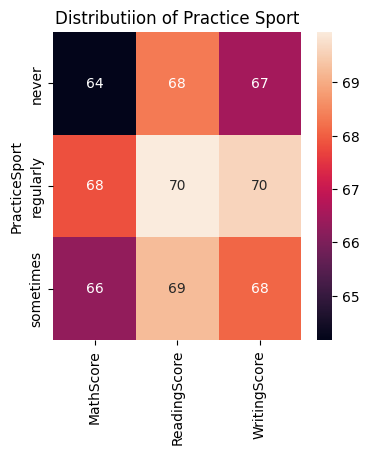

In [25]:
plt.figure(figsize = (4,4))
sns.heatmap(gb6,annot = True)
plt.title("Distributiion of Practice Sport")
plt.show()

Conclusion - From the above chart we have concluded that those who practice sport regularly have highest marks
in all subjects as compared to those who practice sport sometimes and never 

# weekly Study Hours

In [26]:
gb7 = df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb7)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


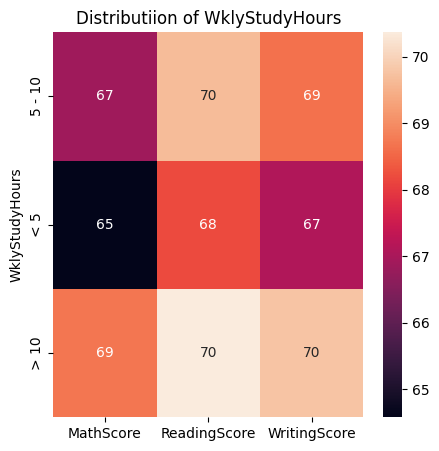

In [27]:
plt.figure(figsize = (5,5))
sns.heatmap(gb7,annot = True)
plt.title("Distributiion of WklyStudyHours")
plt.show()

Conclusion - From the above chart we have concluded that those students who study more than 10 hours 
have scored high marks as compared to those who have not

# Transport Means

In [28]:
gb8 = df.groupby("TransportMeans").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb8)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


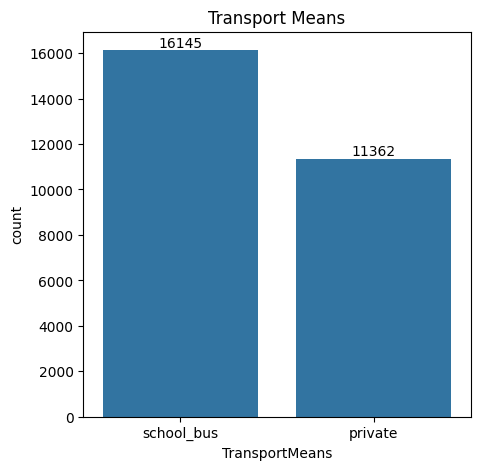

In [29]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "TransportMeans")
ax.bar_label(ax.containers[0])
plt.title("Transport Means")
plt.show()

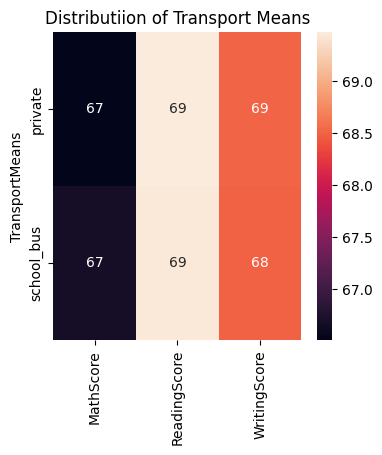

In [30]:
plt.figure(figsize = (4,4))
sns.heatmap(gb8, annot = True)
plt.title("Distributiion of Transport Means")
plt.show()

Conclusion - From the above chart we have concluded that there are no difference of marks who used school bus 
or private vehicle as a transportation means

# Test Preparation

In [31]:
gb9 = df.groupby("TestPrep").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb9)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


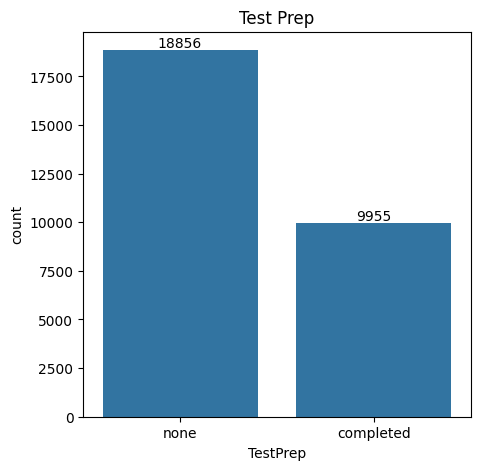

In [32]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "TestPrep")
ax.bar_label(ax.containers[0])
plt.title("Test Prep")
plt.show()

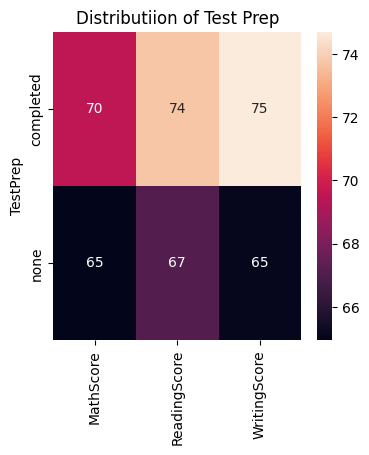

In [33]:
plt.figure(figsize = (4,4))
sns.heatmap(gb9, annot = True)
plt.title("Distributiion of Test Prep")
plt.show()

Conclusion - From the above chart we have concluded that those students who have completed test prepration 
got good marks as compared to those who have not

# Lunch Type

In [34]:
gb10 = df.groupby("LunchType").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb10)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


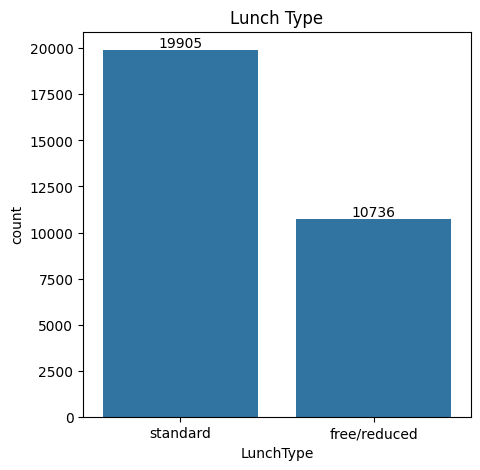

In [35]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "LunchType")
ax.bar_label(ax.containers[0])
plt.title("Lunch Type")
plt.show()

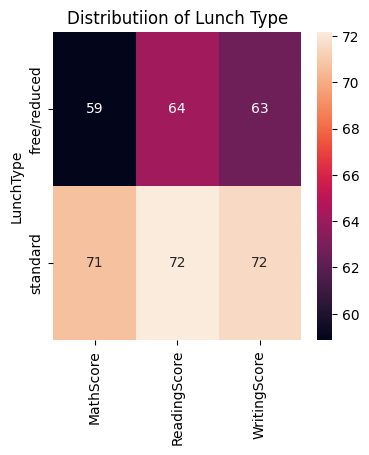

In [36]:
plt.figure(figsize = (4,4))
sns.heatmap(gb10, annot = True)
plt.title("Distributiion of Lunch Type")
plt.show()

Conclusion - From the above chart we have concluded that those students who consume standard lunch scored more marks 
as compared to those who consume free or reduced lunch

Final Conclusion - After analysing all the data, we have concluded that Parents eduction, practice sport, weekly study hours, test 
preparation and lunch type have good impact on students scores